In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Only take 2 classes: Setosa (0) and Versicolor (1)
X = X[y != 2]
y = y[y != 2]

In [7]:
print(iris.feature_names)     # feature names
print(iris.target_names)      # class names
print(iris.data.shape)        # (150, 4)
print(iris.target.shape)      # (150,)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


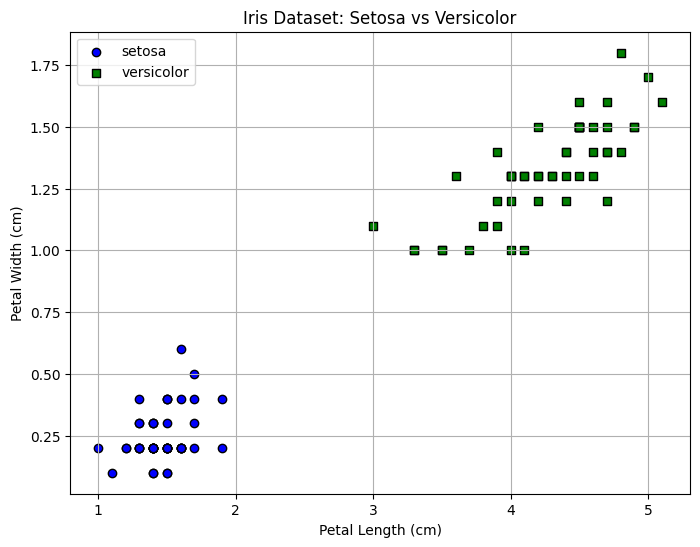

In [17]:
target_names = iris.target_names

# Only take 2 classes: Setosa (0) and Versicolor (1)
X = X[y != 2]
y = y[y != 2]
target_names = target_names[:2]

# Choose two features: Petal Length (index 2) and Petal Width (index 3)
petal_length = X[:, 2]
petal_width = X[:, 3]

# Plot
plt.figure(figsize=(8, 6))
for label, color, marker in zip([0, 1], ['blue', 'green'], ['o', 's']):
    plt.scatter(
        petal_length[y == label],
        petal_width[y == label],
        color=color,
        label=target_names[label],
        marker=marker,
        edgecolor='black'
    )

# Add labels and formatting
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Setosa vs Versicolor')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
model = SVC(kernel='linear')  # You can also try 'rbf' or 'poly'
model.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names[:2]))


Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



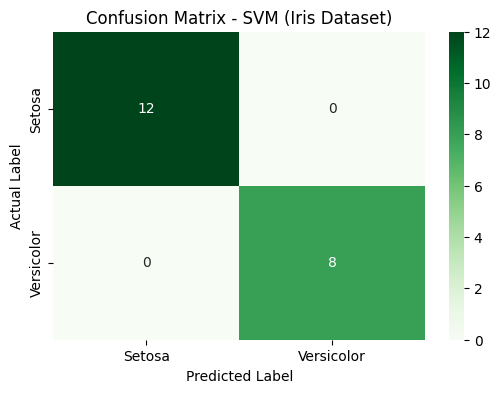

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Define class labels (0 = Setosa, 1 = Versicolor)
labels = ['Setosa', 'Versicolor']

# Step 3: Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)

# Step 4: Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - SVM (Iris Dataset)')
plt.show()


True Positive (TP): Model correctly predicted the positive class.

True Negative (TN): Model correctly predicted the negative class.

False Positive (FP): Model incorrectly predicted positive (Type I error).

False Negative (FN): Model incorrectly predicted negative (Type II error).



Setosa → petal length: 1.0–1.9, petal width: 0.1–0.6

Versicolor → petal length: 3.0–5.1, petal width: 1.0–1.8

In [6]:
sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(sample)
print("Predicted Class:", target_names[prediction[0]])


Predicted Class: setosa


In [12]:
sample = [[6.0, 2.8, 4.7, 1.4]]
prediction = model.predict(sample)
print("Predicted Class:", target_names[prediction[0]])


Predicted Class: versicolor


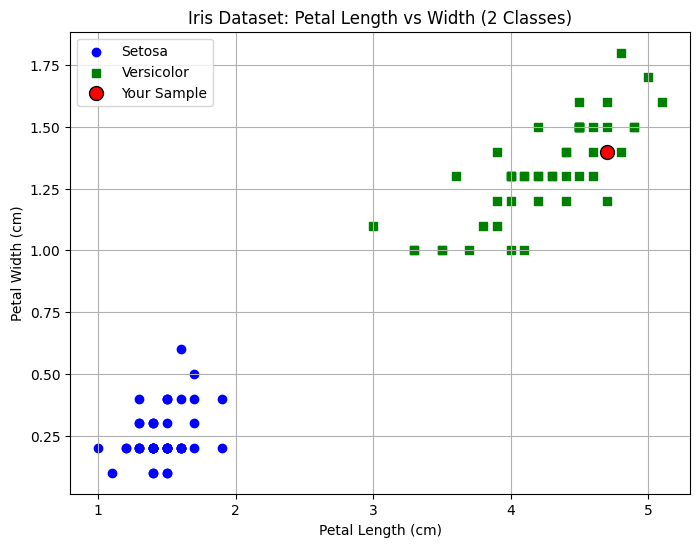

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(petal_length[y == 0], petal_width[y == 0], color='blue', label='Setosa', marker='o')
plt.scatter(petal_length[y == 1], petal_width[y == 1], color='green', label='Versicolor', marker='s')

# Plot your custom sample point
sample = [[6.0, 2.8, 4.7, 1.4]]  # Petal length = 4.7, Petal width = 1.4
plt.scatter(sample[0][2], sample[0][3], color='red', label='Your Sample', s=100, edgecolor='black')

# Labels and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs Width (2 Classes)')
plt.legend()
plt.grid(True)
plt.show()
